# Introduction 

This is the first deliverable from the GAP Analytics Bootcamp. In this notebook, an exploratory data analysis was done on a dataset about declarations of disaster. We assume that the data is exclusively from the US due to the fact that the institution that gather the data is an american one, but we need to confirm this asumption. The members of the group are:

- Cesar Rojas
- Nelson Acuña
- Daniel Troyo 

We will handle the following task in the notebook:

- Discover the size and structure of the dataset
- Handling empty values or notable outliers
- List the usable attributes in the dataset
- Visualize some relationships in the data

# Data Ingestion

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constantes
DS_PATH = "data/eccc91e3-d623-4dc3-8413-1c6164424740_DisasterDeclarations.csv"

# Setea el maximo de filas a desplegar en 8
pd.options.display.max_rows = 15
pd.options.display.max_columns = 24


# Lee el dataset
df = pd.read_csv(DS_PATH, parse_dates = True)
df.head()

,disaster_number,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,title,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area,serialid
0,1,No,Yes,Yes,Yes,GA,1953-05-02T00:00:00,DR,Tornado,TORNADO,1953-05-02T00:00:00,1953-05-02T00:00:00,1954-06-01T00:00:00,NaN,1
1,2,No,Yes,Yes,Yes,TX,1953-05-15T00:00:00,DR,Tornado,TORNADO & HEAVY RAINFALL,1953-05-15T00:00:00,1953-05-15T00:00:00,1958-01-01T00:00:00,NaN,2
2,3,No,Yes,Yes,Yes,LA,1953-05-29T00:00:00,DR,Flood,FLOOD,1953-05-29T00:00:00,1953-05-29T00:00:00,1960-02-01T00:00:00,NaN,3
3,4,No,Yes,Yes,Yes,MI,1953-06-02T00:00:00,DR,Tornado,TORNADO,1953-06-02T00:00:00,1953-06-02T00:00:00,1956-02-01T00:00:00,NaN,4
4,5,No,Yes,Yes,Yes,MT,1953-06-06T00:00:00,DR,Flood,FLOODS,1953-06-06T00:00:00,1953-06-06T00:00:00,1955-12-01T00:00:00,NaN,5


# Some preliminary preprocessing


We'll delete some columns that we noticed are not useful to the general analysis.

In [3]:
# Delete columns
if 'serialid' in df.columns:
    df.drop(['serialid', 'title'], axis=1, inplace=True)
    

# Verify the columns were deleted
df.columns.values

array(['disaster_number', 'ih_program_declared', 'ia_program_declared',
       'pa_program_declared', 'hm_program_declared', 'state',
       'declaration_date', 'disaster_type', 'incident_type',
       'incident_begin_date', 'incident_end_date',
       'disaster_close_out_date', 'declared_county_area'], dtype=object)

Below we'll replace the "Yes" and "No" columns for boolean values

In [4]:
boolean_values = {"Yes": True, "No": False}
boolean_columns = ['ih_program_declared', 'ia_program_declared', 'pa_program_declared', 'hm_program_declared']

for column in boolean_columns:
    df = df.replace({column: boolean_values})
    
df.head()

,disaster_number,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area
0,1,False,True,True,True,GA,1953-05-02T00:00:00,DR,Tornado,1953-05-02T00:00:00,1953-05-02T00:00:00,1954-06-01T00:00:00,NaN
1,2,False,True,True,True,TX,1953-05-15T00:00:00,DR,Tornado,1953-05-15T00:00:00,1953-05-15T00:00:00,1958-01-01T00:00:00,NaN
2,3,False,True,True,True,LA,1953-05-29T00:00:00,DR,Flood,1953-05-29T00:00:00,1953-05-29T00:00:00,1960-02-01T00:00:00,NaN
3,4,False,True,True,True,MI,1953-06-02T00:00:00,DR,Tornado,1953-06-02T00:00:00,1953-06-02T00:00:00,1956-02-01T00:00:00,NaN
4,5,False,True,True,True,MT,1953-06-06T00:00:00,DR,Flood,1953-06-06T00:00:00,1953-06-06T00:00:00,1955-12-01T00:00:00,NaN


We noticed that in the columns 'declaration_date', 'incident_begin_date', 'incident_end_date' the time seems to be set to 00:00:00. This might depend on the disaster, so we checked if for earthquakes (which definitely have a start and end hour) this is also the case.

In [5]:
df[df['incident_type'] == 'Earthquake']

,disaster_number,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area
17,19,False,True,True,True,NV,1954-07-14T00:00:00,DR,Earthquake,1954-07-14T00:00:00,1954-07-14T00:00:00,1957-08-01T00:00:00,NaN
94,96,False,True,True,True,HI,1960-01-21T00:00:00,DR,Earthquake,1960-01-21T00:00:00,1960-01-21T00:00:00,1961-06-09T00:00:00,NaN
166,168,False,True,True,True,AK,1964-03-28T00:00:00,DR,Earthquake,1964-03-28T00:00:00,1964-03-28T00:00:00,1971-06-17T00:00:00,NaN
521,196,False,True,True,True,WA,1965-05-11T00:00:00,DR,Earthquake,1965-05-11T00:00:00,1965-05-11T00:00:00,1968-12-17T00:00:00,King (County)
522,196,False,True,True,True,WA,1965-05-11T00:00:00,DR,Earthquake,1965-05-11T00:00:00,1965-05-11T00:00:00,1968-12-17T00:00:00,Kitsap (County)
523,196,False,True,True,True,WA,1965-05-11T00:00:00,DR,Earthquake,1965-05-11T00:00:00,1965-05-11T00:00:00,1968-12-17T00:00:00,Mason (County)
524,196,False,True,True,True,WA,1965-05-11T00:00:00,DR,Earthquake,1965-05-11T00:00:00,1965-05-11T00:00:00,1968-12-17T00:00:00,Pierce (County)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31185,1415,False,True,False,True,NY,2002-05-16T00:00:00,DR,Earthquake,2002-04-20T00:00:00,2002-04-20T00:00:00,2010-12-21T00:00:00,Washington (County)
31412,1505,True,True,True,True,CA,2004-01-13T00:00:00,DR,Earthquake,2003-12-22T00:00:00,2004-02-06T00:00:00,NaN,Santa Barbara (County)


It seems that the hour is not set for earthquake either. So we'll do a more definitive test for the columns 'declaration_date', 'incident_begin_date', 'incident_end_date' to check if the hour is always zero and if the columns have N/A values.

In [6]:
def classifyUsableDates(hour):
    if not pd.isnull(hour):
        hour = hour.split('T')[1]
        if hour == "00:00:00":
            return "Zero hour"
        else:
            return "Non zero hour"
    else: 
        return "Null date"

dates_columns = ['declaration_date', 'incident_begin_date', 'incident_end_date', 'disaster_close_out_date']
hoursDF = df[dates_columns].apply(lambda x: x.apply(classifyUsableDates))
hoursDF.apply(pd.Series.value_counts, normalize=True)


,declaration_date,incident_begin_date,incident_end_date,disaster_close_out_date
Null date,NaN,NaN,0.008186,0.310743
Zero hour,1.0,1.0,0.991814,0.689257


We found that all the columns have a zero hour or a empty date (i.e. there isn't hour information in the columns). Also, 31% of the records don't have a disaster_close_out_date.

Now, we'll convert the columns 'declaration_date', 'incident_begin_date', 'incident_end_date' from "object" type to "datetime" type.

In [7]:
df[dates_columns] = df[dates_columns].apply(pd.to_datetime)
df[dates_columns]

,declaration_date,incident_begin_date,incident_end_date,disaster_close_out_date
0,1953-05-02,1953-05-02,1953-05-02,1954-06-01
1,1953-05-15,1953-05-15,1953-05-15,1958-01-01
2,1953-05-29,1953-05-29,1953-05-29,1960-02-01
3,1953-06-02,1953-06-02,1953-06-02,1956-02-01
4,1953-06-06,1953-06-06,1953-06-06,1955-12-01
5,1953-06-09,1953-06-09,1953-06-09,1956-03-30
6,1953-06-11,1953-06-11,1953-06-11,1956-06-01
...,...,...,...,...
43360,2013-11-26,2013-11-17,2013-11-17,NaT
43361,2013-11-26,2013-11-17,2013-11-17,NaT


# Exploratory Data Analysis

## Initial EDA

We begin by describing the dataset

In [78]:
df.describe(include='all')

,disaster_number,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area
count,43367.000000,43367,43367,43367,43367,43367,43367,43367,43367,43367,43012,29891,43170
unique,NaN,2,2,2,2,59,2366,4,21,2202,2246,1199,2123
top,NaN,False,False,True,True,TX,2005-09-10 00:00:00,DR,Severe Storm(s),2005-08-29 00:00:00,2005-10-01 00:00:00,1994-06-30 00:00:00,Washington (County)
freq,NaN,35896,23243,41972,32337,3558,777,31287,14544,2764,2926,408,384
first,NaN,NaN,NaN,NaN,NaN,NaN,1953-05-02 00:00:00,NaN,NaN,1953-05-02 00:00:00,1953-05-02 00:00:00,1954-06-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-26 00:00:00,NaN,NaN,2013-11-17 00:00:00,2013-11-17 00:00:00,2013-11-20 00:00:00,NaN
mean,1862.533217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1092.560275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1046.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's explore the categorical columns, or at least those which are not in the continous domain (num stats = NAN)

In [79]:
df.describe(include = ['object', 'bool'] )

,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,disaster_type,incident_type,declared_county_area
count,43367,43367,43367,43367,43367,43367,43367,43170
unique,2,2,2,2,59,4,21,2123
top,False,False,True,True,TX,DR,Severe Storm(s),Washington (County)
freq,35896,23243,41972,32337,3558,31287,14544,384


We observe that the disaster_type column uses acronyms. We explore the possible values and the distributio next...

In [80]:
df['disaster_type'].value_counts()

DR    31287
EM    11045
FM      645
FS      390
Name: disaster_type, dtype: int64

In [81]:
df['disaster_type'].value_counts(normalize = 'True')

DR    0.721447
EM    0.254687
FM    0.014873
FS    0.008993
Name: disaster_type, dtype: float64

We learned that the possible values for disaster_type column are "DR", "EM", "FM", "FS". We reseached and found on a FEMA site HTML the meaning of these acronyms. According to https://www.fema.gov/disasters...

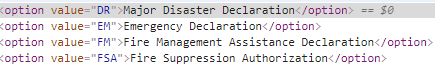

Also, later on (see "Identification of variable/constant columns per disaster_number" section) that these counts were not accurate as a single disaster might have multiple rows if it affected multiple counties.

## Identification of variable/constant columns per disaster_number

While trying out the hist() function we made a histogram of the disaster number. However, the result wasn't the expected uniform distribution...

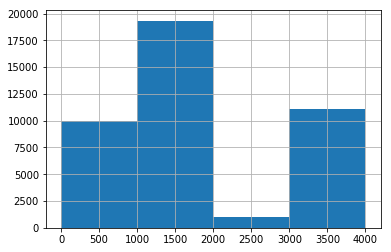

In [8]:
df['disaster_number'].hist(bins=[0,1000,2000,3000,4000])

After reviewing the data, we learned that there might be several rows with the same disaster_number; at first sight it seems that for a same disaster number the only column that changes is the declared_county_area, but we need to confirm this...

In [9]:
df[df['disaster_number'] == 263]

,disaster_number,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area
22168,263,False,True,True,True,TN,1969-07-11,DR,Flood,1969-07-11,1969-07-11,1972-06-22,Clay (County)
22169,263,False,True,True,True,TN,1969-07-11,DR,Flood,1969-07-11,1969-07-11,1972-06-22,Cumberland (County)
22170,263,False,True,True,True,TN,1969-07-11,DR,Flood,1969-07-11,1969-07-11,1972-06-22,Jackson (County)
22171,263,False,True,True,True,TN,1969-07-11,DR,Flood,1969-07-11,1969-07-11,1972-06-22,Macon (County)
22172,263,False,True,True,True,TN,1969-07-11,DR,Flood,1969-07-11,1969-07-11,1972-06-22,Overton (County)
22173,263,False,True,True,True,TN,1969-07-11,DR,Flood,1969-07-11,1969-07-11,1972-06-22,Sumner (County)


We first grouped by disaster_number and made a custom aggregation that, for each disaster_number-column combination, returns True if all the values in the column for the given disaster_number were the same.

In [45]:
def are_all_equal(series):
    if (pd.isna(series.values[0])): # == doesnt work as expected for NaN
        return all(pd.isna(val) for val in series.values)
    else:
        return all(val == series.values[0] for val in series.values)

dfAreSameByDisaster = df.groupby('disaster_number').aggregate(are_all_equal)
dfAreSameByDisaster

,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area
disaster_number,,,,,,,,,,,,
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4151,True,True,True,True,True,True,True,True,True,True,True,True


...and then we made a similar aggregation that for each column, return True if all the disaster_numbers had True as result of the previous aggregation. It seems that the only columns that changes within a same disaster_number are state and declared_county_area.

In [48]:
def are_all_true(series):
    return all(val == True for val in series.values)

dsAreAlltrue = dfAreSameByDisaster.aggregate(are_all_true)
dsAreAlltrue.to_frame().T

,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,state,declaration_date,disaster_type,incident_type,incident_begin_date,incident_end_date,disaster_close_out_date,declared_county_area
0,True,True,True,True,False,True,True,True,True,True,True,False


Finally, we defined columns lists of the 2 types of columns,so we can easily select these columns ahead.

In [57]:
idxConstantColsPerDisasterNum = np.insert(dsAreAlltrue[dsAreAlltrue].index.values, 0, "disaster_number")
idxVariableColsPerDisasterNum = dsAreAlltrue[dsAreAlltrue == False].index.values

idxConstantColsPerDisasterNum
# Sample on how to use
# newDS = ds[idxConstantColsPerDisasterNum]

array(['disaster_number', 'ih_program_declared', 'ia_program_declared',
       'pa_program_declared', 'hm_program_declared', 'declaration_date',
       'disaster_type', 'incident_type', 'incident_begin_date',
       'incident_end_date', 'disaster_close_out_date'], dtype=object)

## EDA - Part 2

Now we know that in order to count the disasters of each type we need to group by disaster_number first (and keep only the columns that are constant per disaster number). 

In [60]:
dfByDisasterNumber = df[idxConstantColsPerDisasterNum].groupby('disaster_number').first()
dfByDisasterNumber

,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,declaration_date,disaster_type,incident_type,incident_begin_date,incident_end_date,disaster_close_out_date
disaster_number,,,,,,,,,,
1,False,True,True,True,1953-05-02,DR,Tornado,1953-05-02,1953-05-02,1954-06-01
2,False,True,True,True,1953-05-15,DR,Tornado,1953-05-15,1953-05-15,1958-01-01
3,False,True,True,True,1953-05-29,DR,Flood,1953-05-29,1953-05-29,1960-02-01
4,False,True,True,True,1953-06-02,DR,Tornado,1953-06-02,1953-06-02,1956-02-01
5,False,True,True,True,1953-06-06,DR,Flood,1953-06-06,1953-06-06,1955-12-01
6,False,True,True,True,1953-06-09,DR,Tornado,1953-06-09,1953-06-09,1956-03-30
7,False,True,True,True,1953-06-11,DR,Tornado,1953-06-11,1953-06-11,1956-06-01
...,...,...,...,...,...,...,...,...,...,...
4151,False,False,True,True,2013-10-24,DR,Severe Storm(s),2013-09-13,2013-09-16,NaT


Now we have accurate counts of each disaster_type

In [61]:
dfByDisasterNumber['disaster_type'].value_counts()

DR    2155
FM     535
EM     363
FS     213
Name: disaster_type, dtype: int64

In [62]:
dfByDisasterNumber['disaster_type'].value_counts(normalize = 'True')

DR    0.659829
FM    0.163809
EM    0.111145
FS    0.065217
Name: disaster_type, dtype: float64

Next, we create a cross tab to examine how the different disaster_type values relate to the incident_type

In [64]:
pd.crosstab(dfByDisasterNumber['disaster_type'], dfByDisasterNumber['incident_type'])

incident_type,Coastal Storm,Dam/Levee Break,Drought,Earthquake,Fire,Fishing Losses,Flood,Freezing,Human Cause,Hurricane,Mud/Landslide,Other,Severe Ice Storm,Severe Storm(s),Snow,Terrorist,Tornado,Toxic Substances,Tsunami,Typhoon,Volcano
disaster_type,,,,,,,,,,,,,,,,,,,,,
DR,15,3,10,28,48,5,708,18,2,202,3,10,41,800,57,1,140,3,4,53,4
EM,8,0,36,0,18,1,28,0,1,101,0,17,8,29,95,1,16,4,0,0,0
FM,0,0,0,0,535,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FS,0,0,0,0,213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# <font color=red>Pending to Sort</font>

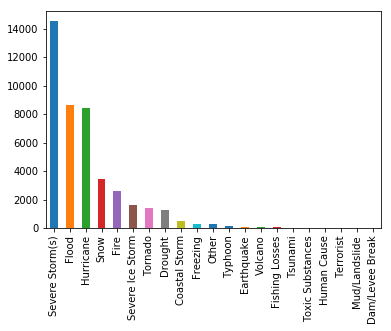

In [82]:
 df['incident_type'].value_counts().plot(kind='bar')

In [83]:
pd.crosstab(df['disaster_type'], df['incident_type'])

incident_type,Coastal Storm,Dam/Levee Break,Drought,Earthquake,Fire,Fishing Losses,Flood,Freezing,Human Cause,Hurricane,Mud/Landslide,Other,Severe Ice Storm,Severe Storm(s),Snow,Terrorist,Tornado,Toxic Substances,Tsunami,Typhoon,Volcano
disaster_type,,,,,,,,,,,,,,,,,,,,,
DR,170,3,87,103,914,34,8334,301,2,3821,4,10,1013,13701,1302,1,1310,3,10,115,49
EM,291,0,1205,0,664,8,286,0,4,4622,0,288,624,843,2135,4,66,5,0,0,0
FM,0,0,0,0,645,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
FS,0,0,0,0,390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's remove useless columns.

In [84]:
dfByDesasterNumber = df.copy()
dfByDesasterNumber.drop(['state', 'declared_county_area'], axis=1, inplace=True)

In [85]:
dfByDesasterNumber.groupby('disaster_number').count()

,ih_program_declared,ia_program_declared,pa_program_declared,hm_program_declared,declaration_date,disaster_type,incident_type,incident_begin_date,incident_end_date,disaster_close_out_date
disaster_number,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
4151,1,1,1,1,1,1,1,1,1,0


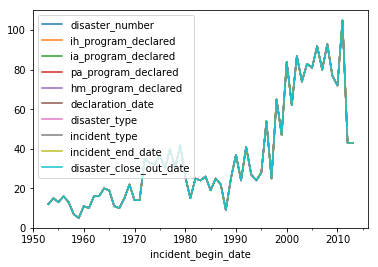

In [86]:
#dfByDesasterNumber.groupby(['disaster_number', 'incident_begin_date']).count().resample('M').count()
dfByDesasterNumber.groupby('incident_begin_date').count().resample('Y').count().plot()

Pending tasks:

- Parse booleans and dates
- See which kind of disasters and in which states the duration is the longest
- See relationship between disaster/state/date and period of time between incident_end and disaster_close_date
- See relationship between disaster/date/period and declaration of assistance programs